In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Download dataset

In [2]:
!git clone https://github.com/NTT123/viwik18.git

Cloning into 'viwik18'...
remote: Enumerating objects: 161, done.
remote: Total 161 (delta 0), reused 0 (delta 0), pack-reused 161 (from 1)
Receiving objects: 100% (161/161), 453.04 MiB | 21.58 MiB/s, done.
Resolving deltas: 100% (29/29), done.
Updating files: 100% (13/13), done.


In [3]:
%cd /kaggle/working/viwik18

/kaggle/working/viwik18


In [4]:
!cat dataset/viwik18_* > viwik18.txt

# Preprocessing

In [5]:
with open('/kaggle/working/viwik18/viwik18.txt', 'r') as f:
    data = f.read()

In [6]:
data[:100]

'trang chính  internet society  internet society hay isoc là một tổ chức quốc tế hoạt động phi lợi nh'

In [7]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 41.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.2 which is incompat

In [8]:
import nltk
from gensim.models import Word2Vec
import gensim
import numpy as np

## Tokenize

In [9]:
len(data)

725975404

In [10]:
tokens = nltk.word_tokenize(data)
tokens[:50]

['trang',
 'chính',
 'internet',
 'society',
 'internet',
 'society',
 'hay',
 'isoc',
 'là',
 'một',
 'tổ',
 'chức',
 'quốc',
 'tế',
 'hoạt',
 'động',
 'phi',
 'lợi',
 'nhuận',
 'phi',
 'chính',
 'phủ',
 'và',
 'bao',
 'gồm',
 'các',
 'thành',
 'viên',
 'có',
 'trình',
 'độ',
 'chuyên',
 'ngành',
 'tổ',
 'chức',
 'này',
 'chú',
 'trọng',
 'đến',
 'tiêu',
 'chuẩn',
 'giáo',
 'dục',
 'và',
 'các',
 'vấn',
 'đề',
 'về',
 'chính',
 'sách']

In [25]:
tokens = [tokens]

In [111]:
len(tokens[0])

150301588

In [112]:
tokens[0][:50]

['trang',
 'chính',
 'internet',
 'society',
 'internet',
 'society',
 'hay',
 'isoc',
 'là',
 'một',
 'tổ',
 'chức',
 'quốc',
 'tế',
 'hoạt',
 'động',
 'phi',
 'lợi',
 'nhuận',
 'phi',
 'chính',
 'phủ',
 'và',
 'bao',
 'gồm',
 'các',
 'thành',
 'viên',
 'có',
 'trình',
 'độ',
 'chuyên',
 'ngành',
 'tổ',
 'chức',
 'này',
 'chú',
 'trọng',
 'đến',
 'tiêu',
 'chuẩn',
 'giáo',
 'dục',
 'và',
 'các',
 'vấn',
 'đề',
 'về',
 'chính',
 'sách']

# Training with Word2Vec

## Với tokenize thông thường

In [114]:
model = gensim.models.Word2Vec(tokens, min_count=3,
                                vector_size=100, window=5)

In [115]:
model.wv['hại']

array([ 0.00281517, -0.00068675, -0.00344386, -0.00785125,  0.00409063,
        0.0018641 , -0.0003524 , -0.00368517, -0.00411273,  0.00052873,
        0.00391011,  0.00788064, -0.00328982,  0.00477023,  0.00100454,
       -0.00109294, -0.00279168,  0.00559451,  0.00261696,  0.00399643,
        0.00879068, -0.00159972,  0.00175795,  0.00408026, -0.00973696,
       -0.00533638, -0.00018232, -0.00471006,  0.00377894, -0.00924248,
        0.00882777, -0.00392147,  0.00648565, -0.00396818, -0.00685222,
        0.00029265,  0.00944357, -0.00429448, -0.0026153 ,  0.0093127 ,
       -0.00725794,  0.00334297, -0.00802243, -0.00185024, -0.00555748,
       -0.00396132, -0.00437823, -0.00617584, -0.00877629,  0.00494196,
       -0.00606467,  0.00369824, -0.00734697,  0.00335038, -0.00368071,
       -0.00474603,  0.00228534, -0.00011169,  0.00454981,  0.00696091,
       -0.00370529, -0.00284715, -0.00866962, -0.00441436,  0.00672393,
       -0.00206175, -0.00760713,  0.00755731, -0.0047059 , -0.00

In [116]:
model.wv.similarity('tổ', 'hội')

0.93956757

## Với bigram dựa trên từ thường xuất hiện cùng nhau

In [70]:
from gensim.models import Word2Vec, Phrases
from gensim.models.phrases import Phraser

phrases = Phrases(tokens, min_count=2, threshold=5)
bigram = Phraser(phrases)

In [71]:
len(tokens)

1

In [72]:
vi_tokens = bigram[tokens[0]]

In [73]:
# chuyển dữ liệu sang dạng bigram
# vi_tokens = [bigram[token] for token in tokens]
print(vi_tokens[:20])

['trang', 'chính', 'internet', 'society', 'internet', 'society', 'hay', 'isoc', 'là', 'một', 'tổ_chức', 'quốc_tế', 'hoạt_động', 'phi', 'lợi_nhuận', 'phi', 'chính_phủ', 'và', 'bao_gồm', 'các']


In [74]:
len(vi_tokens)

119048030

In [75]:
vi_tokens = [vi_tokens]

In [76]:
vi_tokens[0][:20]

['trang',
 'chính',
 'internet',
 'society',
 'internet',
 'society',
 'hay',
 'isoc',
 'là',
 'một',
 'tổ_chức',
 'quốc_tế',
 'hoạt_động',
 'phi',
 'lợi_nhuận',
 'phi',
 'chính_phủ',
 'và',
 'bao_gồm',
 'các']

In [100]:
model_vi = gensim.models.Word2Vec(vi_tokens, min_count=3,
                                vector_size=100, window=5,
                                 sg=0)

In [101]:
model_vi.wv['chính_phủ']

array([ 0.01303316,  0.00758493, -0.01084528,  0.00038171, -0.00070807,
        0.0103311 , -0.00205159,  0.03500237, -0.02195003,  0.01321217,
       -0.02949014, -0.03935624,  0.01115201,  0.00886913, -0.01542299,
       -0.02812318,  0.03505902, -0.00651135,  0.01446791, -0.02354457,
       -0.00468865, -0.00523853,  0.0093122 , -0.01361849, -0.01343084,
       -0.00650626, -0.0192943 , -0.02291165, -0.01146578,  0.00135299,
        0.00361432,  0.01316476,  0.00773131, -0.00859057, -0.00697902,
       -0.00865605,  0.00664614,  0.00924094, -0.00870281, -0.01861114,
       -0.02012474, -0.00958607,  0.01668451,  0.01989051,  0.01106063,
        0.00959225, -0.00733276, -0.02732994, -0.00593439, -0.0170368 ,
        0.02517746,  0.00580868, -0.0056177 , -0.0113981 , -0.01820093,
       -0.00485064,  0.01259463, -0.00595451, -0.03624991,  0.00084672,
        0.00167795, -0.0091618 ,  0.00717484, -0.00918005, -0.03180777,
        0.03772611,  0.00341684,  0.01225845, -0.02148106,  0.01

In [110]:
model_vi.wv.similarity('chính_phủ', 'việt_nam')

0.88317746

In [130]:
model_vi.wv.most_similar('việt_nam', topn=10)

[('việt', 0.9533547163009644),
 ('là', 0.9528264999389648),
 ('tiếng', 0.9527343511581421),
 ('từ', 0.9523279070854187),
 ('các', 0.9514176249504089),
 ('california', 0.9500873684883118),
 ('trong', 0.9495089650154114),
 ('và', 0.9494859576225281),
 ('nhiều', 0.948931872844696),
 ('người', 0.9480267763137817)]

# Visualization

In [138]:
import matplotlib.pyplot as plt

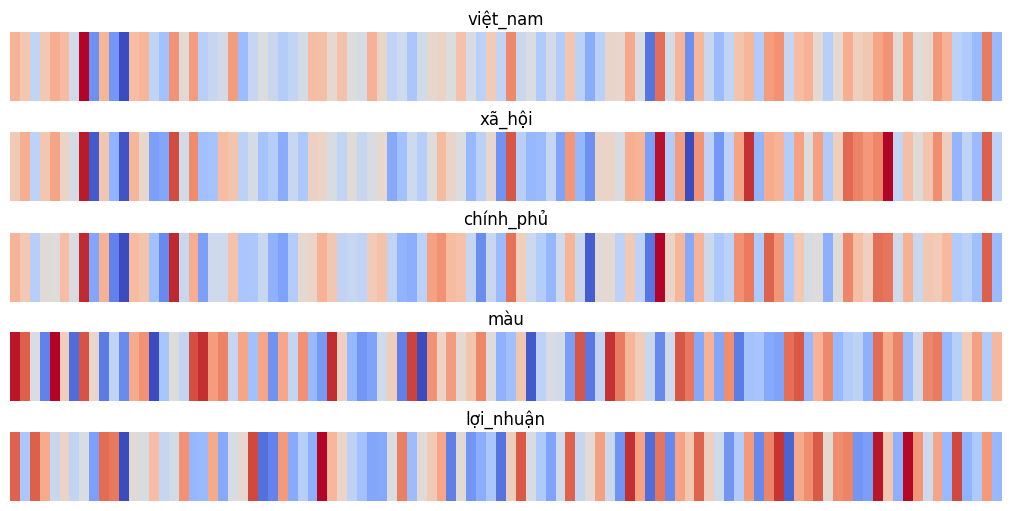

In [139]:
words = ['việt_nam', 'xã_hội', 'chính_phủ', 'màu', 'lợi_nhuận']
vectors = np.array([model_vi.wv[word] for word in words])

scaled_vectors = (vectors - vectors.min()) / (vectors.max() - vectors.min())

fig, axs = plt.subplots(len(words), 1, figsize=(10, 5), constrained_layout=True)
for i, word in enumerate(words):
    cmap = plt.get_cmap('coolwarm')
    colors = cmap(scaled_vectors[i])
    axs[i].imshow([scaled_vectors[i]], aspect='auto', cmap=cmap)
    axs[i].set_title(word)
    axs[i].axis('off')

plt.show()